# Titanic - Machine Learning from Disaster

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Explore the dataframe

In [110]:
# Data frame.
df = pd.read_csv('train.csv', sep=',')

# Drop id, name columns.
#df = df.drop(columns=["PassengerId", "Name"], axis=1)
df = df.drop(columns=["PassengerId"], axis=1)

print("Dataset shape =", df.shape)
print(df.describe())

print("\n\nFirst 10 samples in the dataset:\n\n", df.head(10))

Dataset shape = (891, 11)
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


First 10 samples in the dataset:

    Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1  

In [111]:
print(df[df['Name'].str.contains("Dr.", na=False)])

     Survived  Pclass                                             Name  \
47          1       3                        O'Driscoll, Miss. Bridget   
130         0       3                             Drazenoic, Mr. Jozef   
245         0       1                      Minahan, Dr. William Edward   
317         0       2                             Moraweck, Dr. Ernest   
398         0       2                                 Pain, Dr. Alfred   
416         1       2  Drew, Mrs. James Vivian (Lulu Thorne Christian)   
632         1       1                        Stahelin-Maeglin, Dr. Max   
660         1       1                    Frauenthal, Dr. Henry William   
679         1       1               Cardeza, Mr. Thomas Drake Martinez   
766         0       1                        Brewe, Dr. Arthur Jackson   
796         1       1                      Leader, Dr. Alice (Farnham)   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
47   female   NaN      0      0    

In [112]:
# Define a new column called title.
def get_title(name):
    if 'Sir.' in name:
        return 'Sir'
    elif 'Dr.' in name:
        return 'Dr'
    elif 'Mr.' in name:
        return 'Mr'
    elif 'Master' in name:
        return 'Master'
    elif 'Mrs.' in name:
        return 'Mrs'
    elif 'Ms.' in name:
        return 'Ms'
    elif 'Miss.' in name:
        return 'Miss'
    else:
        return 'N'

title_col = df['Name'].apply(get_title)
print(title_col.value_counts())
df["Title"] = title_col
df = df.drop(columns=['Name'], axis=1)

Name
Mr        517
Miss      182
Mrs       125
Master     40
N          18
Dr          7
Ms          1
Sir         1
Name: count, dtype: int64


In [115]:
# Define a new column called Mother.
mother_col = ((df["Age"] >= 22) & (df["Parch"] != 0)).astype(int)
print(mother_col.value_counts())
df["Mother"] = mother_col

0    794
1     97
Name: count, dtype: int64


In [89]:
# Add new column called Alone.
alone_col = ((df["Parch"] == 0) & (df["SibSp"] == 0)).astype(int)
print(alone_col.value_counts())
df["Alone"] = alone_col

1    537
0    354
Name: count, dtype: int64


## Which feature should we keep/which one should we remove?

In [90]:
# Drop the cabin clumn: too many missing values.
print("Tot missing cabin info:", df['Cabin'].isna().sum())
df = df.drop(columns=["Cabin"], axis=1)

Tot missing cabin info: 687


In [91]:
# Drop also the ticket.
print("Tot missing ticket info:", df['Ticket'].isna().sum())
df = df.drop(columns=["Ticket"], axis=1)

Tot missing ticket info: 0


In [92]:
# Missing values.
print("Missing values for each column\n")
print(df.isna().sum())

Missing values for each column

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
Mother        0
Alone         0
dtype: int64


In [93]:
# We need to manage missing data.

# Fill missing ages with the median value.
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked values with 'S'.
df['Embarked'] = df ['Embarked'].fillna('S')
print(df.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
Mother      0
Alone       0
dtype: int64


In [94]:
# Define X and Y sets.
X = df.drop(columns=["Survived"], axis=1)
Y = df["Survived"]

print("Tot number of samples:", X.shape[0])
features_names = list(X.columns)
print("Features names:", features_names)

X = X.values
Y = Y.values
print("X shape:", X.shape)
print("Y shape:", Y.shape)

Tot number of samples: 891
Features names: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'Mother', 'Alone']
X shape: (891, 10)
Y shape: (891,)


## Encode categorical variable

In [95]:
# Print the data type of each column.
for index_col, name_col in zip(range(X.shape[1]), features_names):
    print(f"Column {name_col} (index: {index_col}) -- data type: {type(X[0, index_col])}")

Column Pclass (index: 0) -- data type: <class 'int'>
Column Sex (index: 1) -- data type: <class 'str'>
Column Age (index: 2) -- data type: <class 'float'>
Column SibSp (index: 3) -- data type: <class 'int'>
Column Parch (index: 4) -- data type: <class 'int'>
Column Fare (index: 5) -- data type: <class 'float'>
Column Embarked (index: 6) -- data type: <class 'str'>
Column Title (index: 7) -- data type: <class 'str'>
Column Mother (index: 8) -- data type: <class 'int'>
Column Alone (index: 9) -- data type: <class 'int'>


In [96]:
# Encode the categorical variables.
from sklearn.preprocessing import OrdinalEncoder

# Sex and Embarked columns need to be encoded.
to_encode = [1, 6, 7] 

# Define the encode and encode the specified columns.
enc = OrdinalEncoder()
X[:, to_encode] = enc.fit_transform(X[:, to_encode])

In [97]:
# Print the data type of each column.
for index_col, name_col in zip(range(X.shape[1]), features_names):
    print(f"Column {name_col} (index: {index_col}) -- data type: {type(X[0, index_col])}")

Column Pclass (index: 0) -- data type: <class 'int'>
Column Sex (index: 1) -- data type: <class 'float'>
Column Age (index: 2) -- data type: <class 'float'>
Column SibSp (index: 3) -- data type: <class 'int'>
Column Parch (index: 4) -- data type: <class 'int'>
Column Fare (index: 5) -- data type: <class 'float'>
Column Embarked (index: 6) -- data type: <class 'float'>
Column Title (index: 7) -- data type: <class 'float'>
Column Mother (index: 8) -- data type: <class 'int'>
Column Alone (index: 9) -- data type: <class 'int'>


## Split data into train/validation and test

In [98]:
# Split data.
m = X.shape[0]
m_train = int(3./5. * m)
m_val = int((m - m_train) / 2.)
m_test = m - m_train - m_val

print("Amount of data for training set:", m_train)
print("Amount of data for validation set", m_val)
print("Amount of data for test set:", m_test)

Amount of data for training set: 534
Amount of data for validation set 178
Amount of data for test set: 179


In [99]:
from sklearn.model_selection import train_test_split

# Transform all samples into vector of folat values.
X = np.array(X, dtype=np.float32)

# Split into train_val and test.
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=m_test/m, random_state=12)

# Split into train and val.
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=m_val/(m_train + m_val), random_state=12)

# Check size of sets.
print("Training size:", X_train.shape[0])
print("Validation size:", X_val.shape[0])
print("Training and validation size:", X_train_val.shape[0])
print("Test size:", X_test.shape[0])

Training size: 534
Validation size: 178
Training and validation size: 712
Test size: 179


## Data Standardization

In [100]:
from sklearn.preprocessing import StandardScaler

# Fare column need to be scaled.
to_scale = [5]

# Create a copy for each set.
X_train_scaled = np.copy(X_train)
X_test_scaled = np.copy(X_test)
X_val_scaled = np.copy(X_val)
X_train_val_scaled = np.copy(X_train_val)

# Scale data.
scaler = StandardScaler().fit(X_train[:, to_scale])
X_train_scaled[:, to_scale] = scaler.transform(X_train[:, to_scale])
X_test_scaled[:, to_scale] = scaler.transform(X_test[:, to_scale])
X_val_scaled[:, to_scale] = scaler.transform(X_val[:, to_scale])
X_train_val_scaled[:, to_scale] = scaler.transform(X_train_val[:, to_scale])

In [101]:
from sklearn.model_selection import KFold
from itertools import product

def k_fold_cross_validation(X, Y, model_func, num_folds = 10, verbose=False, **param_grid):

    # -- grid of hyperparams into list
    param_keys = list(param_grid.keys())
    param_values = list(param_grid.values())
    
    # Generate Cartesian product of values
    combinations = product(*param_values)
    
    # Create a list of dictionaries from combinations
    param_list = [dict(zip(param_keys, combination)) for combination in combinations]

    kf = KFold(n_splits = num_folds)
    
    err_validation_kfold = np.zeros(len(param_list),)
    err_training_kfold = np.zeros(len(param_list),)

    for i, params in enumerate(param_list):

        model = model_func(**params)
        
        for train_index, validation_index in kf.split(X):
            X_train_kfold, X_val_kfold = X[train_index], X[validation_index]
            Y_train_kfold, Y_val_kfold = Y[train_index], Y[validation_index]
            
            # -- data scaling: standardize features with respect to the current folds
            scaler_kfold = StandardScaler().fit(X_train_kfold)
            X_train_kfold_scaled = scaler_kfold.transform(X_train_kfold)
            X_val_kfold_scaled = scaler_kfold.transform(X_val_kfold)
        
            # -- learn the model using the training data from the k-fold
            model.fit(X_train_kfold_scaled, Y_train_kfold)
            
            # -- incremental mean
            err_training_kfold[i] += (1.0 - model.score(X_train_kfold_scaled, Y_train_kfold))
            err_validation_kfold[i] += (1.0 - model.score(X_val_kfold_scaled, Y_val_kfold))

    
    # -- compute the mean
    err_training_kfold /= num_folds
    err_validation_kfold /= num_folds
    
    # -- choose the best paramter: the one that minimizes the (the estimation of the true) loss
    best_param = param_list[np.argmin(err_validation_kfold)]

    if verbose:
        print("Optimal paramters:", best_param)
        print("Min validation error", np.min(err_validation_kfold))
    
    return best_param, err_training_kfold, err_validation_kfold

In [102]:
def plot_model_selection_curve(x, err_train, err_val, opt_x, xlabel=None, title=None):
    # Plot the training error.
    plt.plot(x, err_train,  color='r', marker='x', label="Train")
    # Plot the validation error.
    plt.plot(x, err_val,  color='b',  marker='x', label="Validation")
    # Optimal point.
    if xlabel:
        plt.scatter(opt_x,  np.min(err_val),  color='b',  marker='o',  linewidths=5, label=f"{xlabel} opt={opt_x}")
    else:
        plt.scatter(opt_x,  np.min(err_val),  color='b',  marker='o',  linewidths=5)
    plt.legend()
    if xlabel:
        plt.xlabel(xlabel)
    plt.ylabel("Error")
    if title:
        plt.title(title)
    plt.show()

## Define the function that implement the k-cross fold validation

## Train best decision tree model

Optimal paramters: {'max_depth': 5, 'random_state': 12}
Min validation error 0.17969951083158628


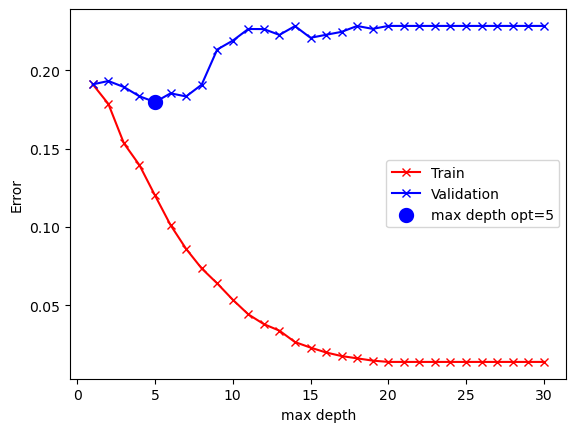

In [103]:
from sklearn.tree import DecisionTreeClassifier

params = {
    "max_depth": [v for v in range(1, 31)],
    "random_state": [12]
}
opt_params, err_train, err_val = k_fold_cross_validation(
    X_train_scaled,
    Y_train,
    model_func=DecisionTreeClassifier,
    verbose=True,
    **params
)
plot_model_selection_curve(
    params["max_depth"],
    err_train,
    err_val,
    opt_params["max_depth"],
    xlabel="max depth"
)

In [104]:
# Final model for decision tree.
final_decision_tree = DecisionTreeClassifier(**opt_params)
final_decision_tree.fit(X_train_scaled, Y_train)
print("Training error:", 1 - final_decision_tree.score(X_train_scaled, Y_train))

Training error: 0.1179775280898876


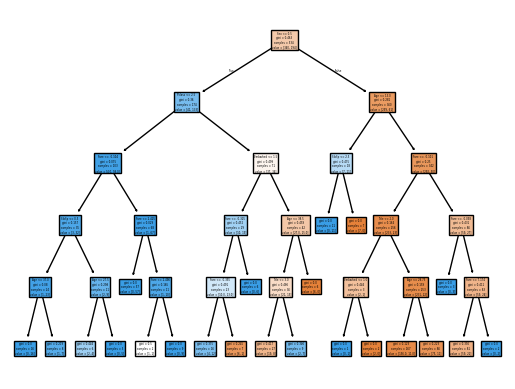

In [105]:
# Plot the tree of the final model.
from sklearn import tree

plt.figure()
tree.plot_tree(decision_tree=final_decision_tree,
               feature_names=features_names, 
               filled=True)
plt.savefig("tree.pdf")
plt.show()

In [106]:
# Print features importance.
print([f"{x} = {str(y)}" for x,y in zip(features_names, final_decision_tree.feature_importances_)])

['Pclass = 0.13232995779316636', 'Sex = 0.561984877852979', 'Age = 0.07030298268986845', 'SibSp = 0.05990973484269854', 'Parch = 0.0', 'Fare = 0.12220562966250213', 'Embarked = 0.029649308188527616', 'Title = 0.023617508970258033', 'Mother = 0.0', 'Alone = 0.0']


## Train best random forset model

Optimal paramters: {'max_depth': 7, 'random_state': 12}
Min validation error 0.15345911949685534


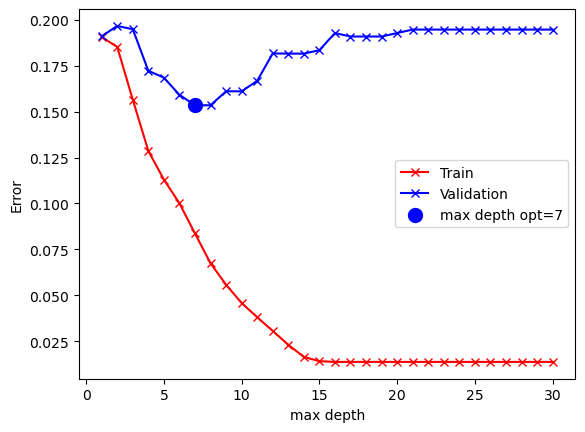

In [107]:
from sklearn.ensemble import RandomForestClassifier

# Find best value for max depth.
params = {
    "max_depth": [v for v in range(1, 31)], 
    "random_state": [12]
}
opt_params, err_train, err_val = k_fold_cross_validation(
    X_train_scaled, Y_train, 
    model_func=RandomForestClassifier,
    verbose=True,
    **params
)
plot_model_selection_curve(
    params["max_depth"], 
    err_train,
    err_val,
    opt_params["max_depth"],
    xlabel="max depth",
)

In [108]:
# Final model for random forest.
final_random_forest = RandomForestClassifier(**opt_params)
final_random_forest.fit(X_train_scaled, Y_train)
print("Training error:", 1 - final_random_forest.score(X_train_scaled, Y_train))

Training error: 0.09176029962546817


## Train best model for SVM model: best model for different kernel functions

Optimal paramters: {'C': 1, 'kernel': 'linear', 'random_state': 12}
Min validation error 0.19098532494758907


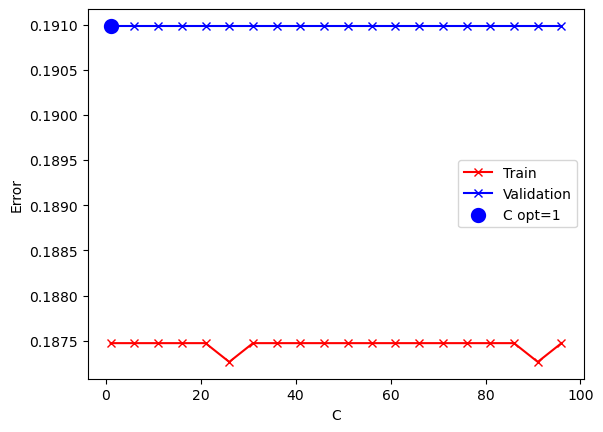

In [63]:
# Find the best SVM with linear kernel.
from sklearn.svm import SVC

params = {
    "C": np.arange(1, 100, 5).tolist(),
    "kernel": ["linear"],
    "random_state": [12]
}
opt_params, err_train, err_val = k_fold_cross_validation(
    X_train_scaled,
    Y_train,
    model_func=SVC,
    verbose=True,
    **params
)
plot_model_selection_curve(
    params["C"],
    err_train,
    err_val,
    opt_params["C"],
    xlabel="C"
)

Mmmh we're not learning anything... with linear kernel.

In [64]:
# Final model for lin svm.
final_lin_svm = SVC(**opt_params)
final_lin_svm.fit(X_train_scaled, Y_train)
print("Training error:", 1 - final_lin_svm.score(X_train_scaled, Y_train))

Training error: 0.18913857677902624


In [65]:
# Train best rbf.
params = {
    "C": np.arange(1, 100, 5).tolist(),
    "kernel": ["rbf"],
    "gamma": [0.01, 0.03, 0.04, 0.05],
    "random_state": [12]
}
opt_params, err_train, err_val = k_fold_cross_validation(
    X_train_scaled,
    Y_train,
    model_func=SVC,
    verbose=True,
    **params
)

Optimal paramters: {'C': 11, 'kernel': 'rbf', 'gamma': 0.05, 'random_state': 12}
Min validation error 0.14601677148846956


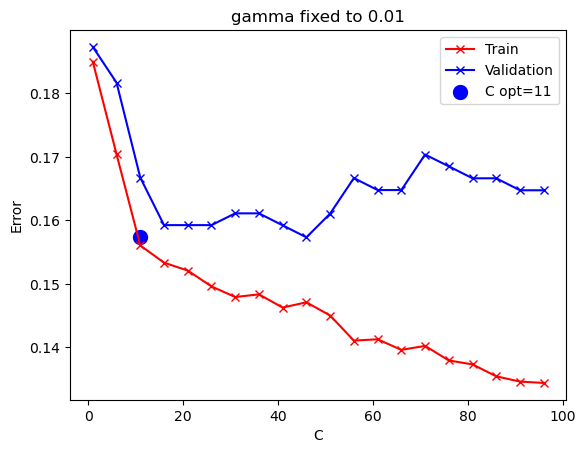

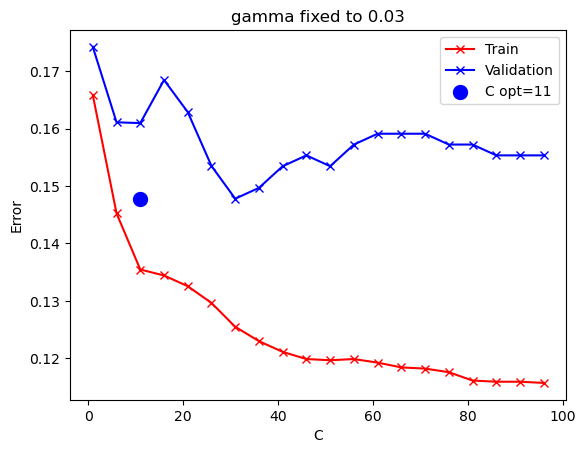

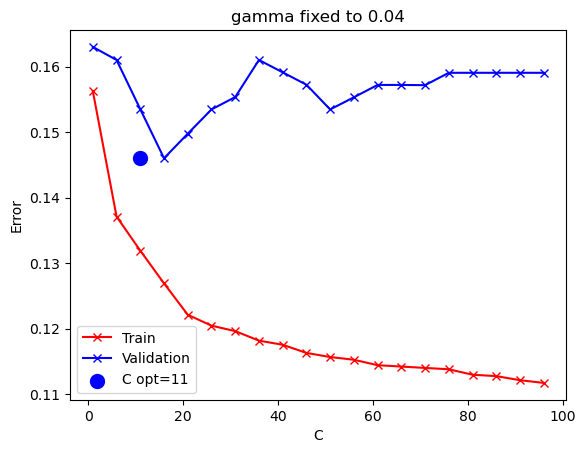

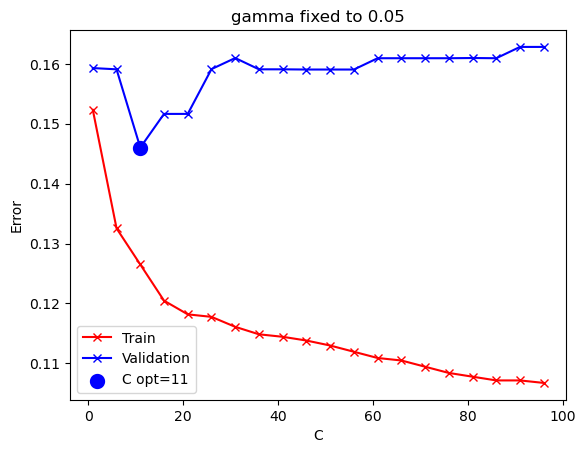

In [66]:
# Plot relation between C and different values of gamma.
z = ["gamma", [0.01, 0.03, 0.04, 0.05]]
jump = len(z[1])

# Grid of hyperparams into list
param_keys = list(params.keys())
param_values = list(params.values())

# Generate Cartesian product of values
combinations = product(*param_values)
param_list = [dict(zip(param_keys, combination)) for combination in combinations]

plt.figure()
for i in range(jump):
    C_vals = [x["C"] for x in param_list]

    plot_model_selection_curve(
        C_vals[i::jump],
        err_train[i::jump],
        err_val[i::jump],
        opt_params["C"],
        title=f"{z[0]} fixed to {z[1][i]}",
        xlabel="C"
    )

In [67]:
# Final model for rbf svm.
final_rbf_svm = SVC(**opt_params)
final_rbf_svm.fit(X_train_scaled, Y_train)
print("Training error:", 1 - final_rbf_svm.score(X_train_scaled, Y_train))

Training error: 0.10299625468164797


In [68]:
# Learn best model for sigmoid.
params = {
    "C": np.arange(1, 100, 5).tolist(),
    "kernel": ["sigmoid"],
    "gamma": [0.01, 0.03, 0.04, 0.05],
    "coef0": np.arange(0, 5, 1).tolist(),
    "random_state": [12]
}
opt_params, err_train, err_val = k_fold_cross_validation(
    X_train_scaled,
    Y_train,
    model_func=SVC,
    verbose=True,
    **params
)

Optimal paramters: {'C': 1, 'kernel': 'sigmoid', 'gamma': 0.05, 'coef0': 2, 'random_state': 12}
Min validation error 0.183508036338225


In [69]:
# Train best model for sigmoid kernel.
final_sig_svm = SVC(**opt_params)
final_sig_svm.fit(X_train_scaled, Y_train)
print("Training error:", 1 - final_sig_svm.score(X_train_scaled, Y_train))

Training error: 0.36329588014981273


In [70]:
# Best params for poly kernel.
params = {
    "C": np.arange(1, 100, 5).tolist(),
    "kernel": ["poly"],
    "degree": [2, 3, 4],
    "gamma": [0.01, 0.03, 0.04, 0.05],
    "coef0": np.arange(0, 1, 1).tolist(),
    "random_state": [12]
}
opt_params, err_train, err_val = k_fold_cross_validation(
    X_train_scaled,
    Y_train,
    model_func=SVC,
    verbose=True,
    **params
)

Optimal paramters: {'C': 61, 'kernel': 'poly', 'degree': 2, 'gamma': 0.03, 'coef0': 0, 'random_state': 12}
Min validation error 0.16858839972047518


In [71]:
# Train best model for poly kernel.
final_poly_svm = SVC(**opt_params)
final_poly_svm.fit(X_train_scaled, Y_train)
print("Training error:", 1 - final_poly_svm.score(X_train_scaled, Y_train))

Training error: 0.15355805243445697


## Train best Deep Neural Network model

Just for fun...

In [33]:
# We are going to use pytorch.
import torch
import torch.nn as nn

In [34]:
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#print("device:", device)

In [35]:
# We need this wrapper because we cannot use directly 
# the trainin set X creted with scikitlearn.
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, X, Y):
        self.features = X
        self.labels = Y
        
    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        features = torch.tensor(self.features[idx], dtype=torch.float32)
        labels = torch.tensor(self.labels[idx], dtype=torch.float32)
        return features, labels

In [36]:
# Define a simple NN.
class NN(nn.Module):

    # Need the following for the kfold func compatibility.
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    def __init__(self, layers):
        super(NN, self).__init__()
        torch.manual_seed(12)

        # Define the structure.
        self.layers = nn.ModuleList()
        for i in range(1, len(layers)):
            self.layers.append(nn.Linear(layers[i-1], layers[i]))
        self.layers.append(nn.Linear(layers[-1], 1)) # Last layer
        
        # Acivaction function.
        self.actfunc = nn.ReLU() 

        # Need the following for the kfold func compatibility.
        self.to(NN.device)

    def forward(self, x):
        out = x
        for i, layer in enumerate(self.layers):
            out = layer(out)
            if i < len(self.layers) - 1:
                out = self.actfunc(out)
        out = torch.sigmoid(out)
        return out
        

    def fit(self, X, Y, epochs=10):
        # Crate dataset and dataloader.
        train_ds= MyDataset(X, Y)
        train_loader = torch.utils.data.DataLoader(dataset=train_ds, batch_size=1, shuffle=True)

        # Function cost.
        cost = nn.BCELoss()
        # Optimizier used.
        optimizer = torch.optim.Adam(self.parameters(), lr=0.001)

        # Train the model.
        for _ in range(epochs):
            for i, (x, y) in enumerate(train_loader):
                x = x.to(NN.device)
                y = y.to(NN.device)
        
                # Forward pass: make the prediction.
                outputs = self(x).squeeze(1) # Get predictions.
        
                loss = cost(outputs, y) # Compute the costs.
        
                # Backward and optimize
                optimizer.zero_grad() # Compute the gradient for current batch.
                loss.backward() # Compute back propagation (sensitivity vec)
                optimizer.step() # Update the weights.

    
    def score(self, X, Y):
        # Crate dataset and dataloader.
        train_ds= MyDataset(X, Y)
        train_loader = torch.utils.data.DataLoader(dataset=train_ds, batch_size=1, shuffle=True)
        
        with torch.no_grad(): # Do not compute gradients.
            correct = 0
            total = 0
            for x, y in train_loader:
                # Move data to GPU.
                x = x.to(NN.device)
                y = y.to(NN.device)
        
                # Predict output.
                outputs = self(x).squeeze(1)
                outputs = (outputs >= 0.5).float()
                
                # Check if prediction is correct.
                total += y.size(0)
                correct += (outputs == y).sum().item()
            return correct / total

In [37]:
# Define input size (number of features).
input_size = len(features_names)

# Stucture of the NN is:
# 3 hidden layers with 4 neurons each.
structure = [input_size, 4, 4, 4]
layers = {"layers": structure}

# Create model.
nn_model = NN(**layers)
print("Model structure:")
print(nn_model)

Model structure:
NN(
  (layers): ModuleList(
    (0): Linear(in_features=8, out_features=4, bias=True)
    (1-2): 2 x Linear(in_features=4, out_features=4, bias=True)
    (3): Linear(in_features=4, out_features=1, bias=True)
  )
  (actfunc): ReLU()
)


In [38]:
nn_model.fit(X_train_scaled, Y_train)
print("Training error:", 1 - nn_model.score(X_train_scaled, Y_train))
print("Validation error:", 1 - nn_model.score(X_val_scaled, Y_val))

Training error: 0.33333333333333337
Validation error: 0.3764044943820225


Optimal paramters: {'layers': [8, 14]}
Min validation error 0.14786862334032141


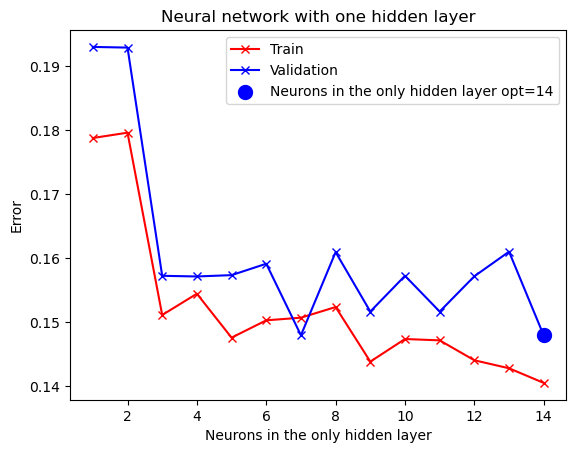

In [39]:
params = {
    "layers": [[input_size, x] for x in range(1, 15)]
}
opt_params, err_train, err_val = k_fold_cross_validation(
    X_train_scaled,
    Y_train,
    model_func=NN,
    verbose=True,
    **params
)
plot_model_selection_curve(
    range(1, len(params["layers"]) + 1),
    err_train,
    err_val,
    opt_params["layers"][1],
    xlabel="Neurons in the only hidden layer",
    title="Neural network with one hidden layer"
)

In [40]:
# Final model for NN with only one hidden layer.
final_nn_1h = NN(**opt_params)
final_nn_1h.fit(X_train_scaled, Y_train, epochs=50)
print("Training error:", 1 - final_nn_1h.score(X_train_scaled, Y_train))

Training error: 0.15543071161048694


Optimal paramters: {'layers': [8, 10, 10, 10]}
Min validation error 0.13843466107617047


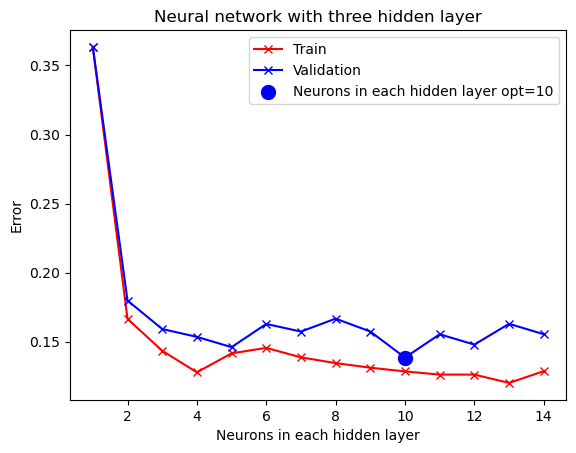

In [42]:
# Neural network with 3 hidden layers.
params = {
    "layers": [[input_size, x, x, x] for x in range(1, 15)]
}
opt_params, err_train, err_val = k_fold_cross_validation(
    X_train_scaled,
    Y_train,
    model_func=NN,
    verbose=True,
    **params
)
plot_model_selection_curve(
    range(1, len(params["layers"]) + 1),
    err_train,
    err_val,
    opt_params["layers"][1],
    xlabel="Neurons in each hidden layer",
    title="Neural network with three hidden layer"
)

In [43]:
# Final model for NN with 3 hidden layer (with same size).
final_nn_3h = NN(**opt_params)
final_nn_3h.fit(X_train_scaled, Y_train, epochs=50)
print("Training error:", 1 - final_nn_3h.score(X_train_scaled, Y_train))

Training error: 0.15543071161048694


## Compare final models using validation set

In [73]:
val_errors = {}

val_errors["decision tree"] = 1 - final_decision_tree.score(X_val_scaled, Y_val)
print("Validation error decision tree:", val_errors["decision tree"])

val_errors["random forest"] = 1 - final_random_forest.score(X_val_scaled, Y_val)
print("Validation error random forest:", val_errors["random forest"])

val_errors["lin svm"] = 1 - final_lin_svm.score(X_val_scaled, Y_val)
print("Validation error linear svm:", val_errors["lin svm"])

val_errors["rbf svm"] = 1 - final_rbf_svm.score(X_val_scaled, Y_val)
print("Validation error rbf svm:", val_errors["rbf svm"])

val_errors["sig svm"] = 1 - final_sig_svm.score(X_val_scaled, Y_val)
print("Validation error sigmoid svm:", val_errors["sig svm"])

val_errors["poly svm"] = 1 - final_poly_svm.score(X_val_scaled, Y_val)
print("Validation error poly svm", val_errors["poly svm"])

#val_errors["nn 1h"] = 1 - final_nn_1h.score(X_val_scaled, Y_val)
#print("Validation error nn 1h", val_errors["nn 1h"])
#
#val_errors["nn 3h"] = 1 - final_nn_3h.score(X_val_scaled, Y_val)
#print("Validation error nn 3h", val_errors["nn 3h"])

best_model_name = min(val_errors, key=val_errors.get)
print("\nBest model:", best_model_name)

Validation error decision tree: 0.1629213483146067
Validation error random forest: 0.1629213483146067
Validation error linear svm: 0.2303370786516854
Validation error rbf svm: 0.2134831460674157
Validation error sigmoid svm: 0.3876404494382022
Validation error poly svm 0.1853932584269663

Best model: decision tree


## Final best model

In [74]:
final_model = None
if best_model_name == "decision tree":
    final_model = final_decision_tree
elif best_model_name == "random forest":
    final_model = final_random_forest
elif best_model_name == "rbf svm":
    final_model = final_rbf_svm
elif best_model_name == "sig svm":
    final_model = final_sig_svm
elif best_model_name == "lin svm":
    final_model = final_lin_svm
elif best_model_name == "poly svm":
    final_model = final_poly_svm
elif best_model_name == "nn 1h":
    final_model = final_nn_1h
elif best_model_name == "nn 3h":
    final_model = final_nn_3h

print(best_model_name)
final_model.fit(X_train_val_scaled, Y_train_val)
print(1 - final_model.score(X_test_scaled, Y_test))

decision tree
0.2178770949720671


## Predictions on test set

In [47]:
df = pd.read_csv('test.csv', sep=',')

# Drop id, name columns.
df = df.drop(columns=["Cabin", "Ticket"], axis=1)

df['Title'] = df['Name'].apply(get_title)
df = df.drop(columns=["Name"], axis=1)

# Fill missing values.
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df['Age'] = df['Age'].fillna(df['Age'].median())

# Drop missing values (if any).
print(df.isna().sum())
df = df.dropna()

X_test = df[features_names]
print(X_test)

X_test = np.array(X_test)

# Encode categorical and scale continuous cols.
X_test[:, to_encode] = enc.fit_transform(X_test[:, to_encode])
X_test[:, to_scale] = scaler.transform(X_test[:, to_scale])

X_test = np.array(X_test, dtype=np.float32)

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64
     Pclass     Sex   Age  SibSp  Parch      Fare Embarked   Title
0         3    male  34.5      0      0    7.8292        Q      Mr
1         3  female  47.0      1      0    7.0000        S     Mrs
2         2    male  62.0      0      0    9.6875        Q      Mr
3         3    male  27.0      0      0    8.6625        S      Mr
4         3  female  22.0      1      1   12.2875        S     Mrs
..      ...     ...   ...    ...    ...       ...      ...     ...
413       3    male  27.0      0      0    8.0500        S      Mr
414       1  female  39.0      0      0  108.9000        C       N
415       3    male  38.5      0      0    7.2500        S      Mr
416       3    male  27.0      0      0    8.0500        S      Mr
417       3    male  27.0      1      1   22.3583        C  Master

[418 rows x 8 columns]


In [49]:
# Compute predictions.
predictions = final_model.predict(X_test)

# Save predictions.
output = pd.DataFrame({'PassengerId': df.PassengerId, 'Survived': predictions}) 
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
